## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


## Step 2: Load the Data

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


 ## Step 3: Preprocessing

In [3]:
# Check total missing values
total_missing = df.isnull().sum().sum()
print(f"Total missing values in dataset: {total_missing}\n")

# Check missing values per column
missing_per_column = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_per_column)

Total missing values in dataset: 2563

Missing values per column:
Population                         652
Hepatitis B                        553
GDP                                448
Total expenditure                  226
Alcohol                            194
Income composition of resources    167
Schooling                          163
 thinness 5-9 years                 34
 thinness  1-19 years               34
 BMI                                34
Polio                               19
Diphtheria                          19
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Country                              0
Year                                 0
Measles                              0
percentage expenditure               0
infant deaths                        0
Status                               0
under-five deaths                    0
dtype: int64


In [4]:
# Drop non-informative or non-numeric columns
df = df.drop(['Country', 'Year'], axis=1)

# Encode categorical column 'Status'
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


 ## Step 4: Statistical Analysis

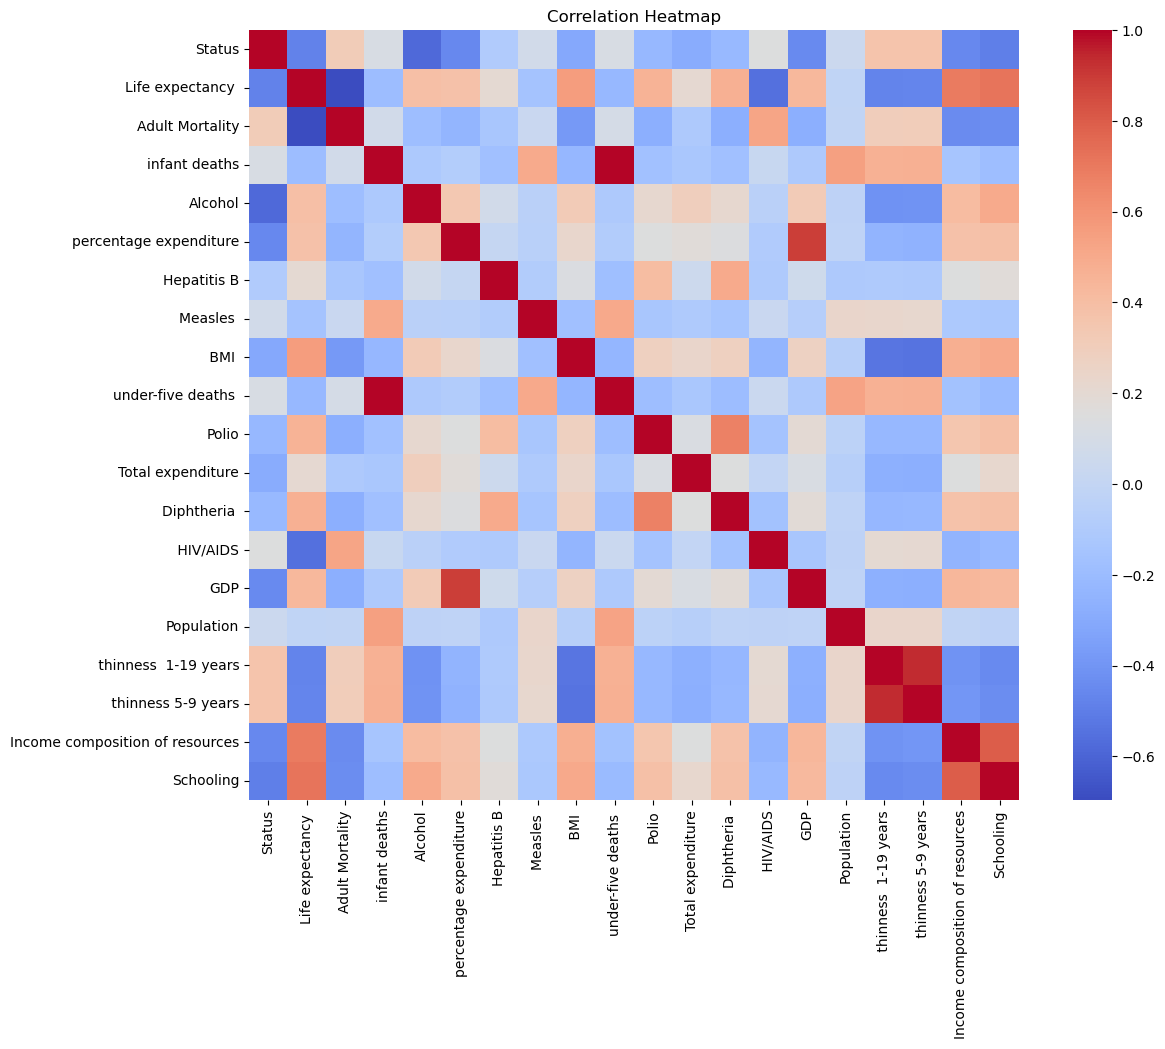

Top features affecting Life Expectancy:
 Life expectancy                    1.000000
Schooling                          0.715066
Income composition of resources    0.692483
 BMI                               0.559255
Diphtheria                         0.475418
Polio                              0.461574
GDP                                0.430493
Alcohol                            0.391598
percentage expenditure             0.381791
Total expenditure                  0.207981
Hepatitis B                        0.203771
Population                        -0.019638
Measles                           -0.157574
infant deaths                     -0.196535
under-five deaths                 -0.222503
 thinness 5-9 years               -0.466629
 thinness  1-19 years             -0.472162
Status                            -0.481962
 HIV/AIDS                         -0.556457
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


In [5]:
# Correlation matrix
plt.figure(figsize=(14, 10))
corr = df_imputed.corr()
sns.heatmap(corr, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# Top correlations with Life Expectancy
life_corr = corr['Life expectancy '].sort_values(ascending=False)
print("Top features affecting Life Expectancy:\n", life_corr)


## Step 5: Multiple Regression Models + Evaluation

In [7]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Prepare data
X = df_imputed.drop("Life expectancy ", axis=1)
y = df_imputed["Life expectancy "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Evaluate models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": round(rmse, 2),
        "R² Score": round(r2, 4)
    })

# Display comparison
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df)


               Model  RMSE  R² Score
1      Random Forest  1.65    0.9686
2            XGBoost  1.76    0.9643
0  Linear Regression  3.90    0.8241


## Step 6: Visualize Predictions of the Best Model

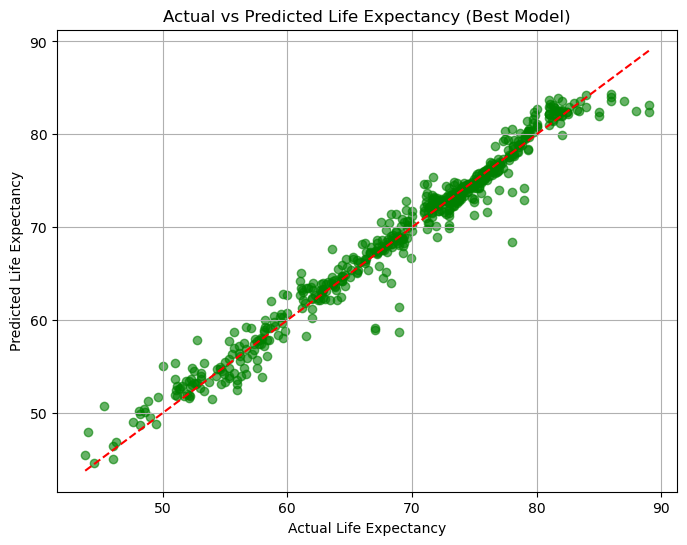

In [8]:
# Assuming best model is Random Forest
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy (Best Model)")
plt.grid(True)
plt.show()


## Step 7: Compare Predictions on Sample Test Data 

In [9]:
# Create a comparison DataFrame for sample data
comparison_df = pd.DataFrame({
    "Actual Life Expectancy": y_test.values,
    "Predicted Life Expectancy": y_pred_best
}).reset_index(drop=True)

# Show first 10 samples
comparison_df_sample = comparison_df.head(10)
print(comparison_df_sample)

   Actual Life Expectancy  Predicted Life Expectancy
0                    73.7                     72.902
1                    75.9                     76.052
2                    74.2                     74.778
3                    76.8                     75.919
4                    51.9                     53.505
5                    49.6                     51.777
6                    67.4                     65.883
7                    73.9                     73.834
8                    77.2                     76.909
9                    55.0                     55.536


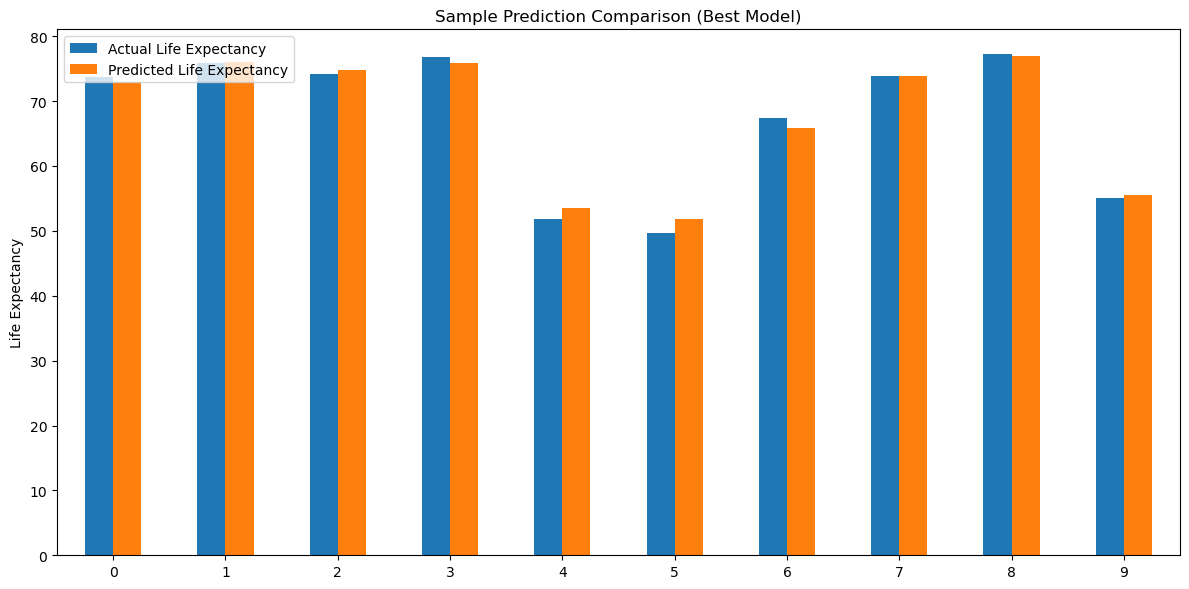

In [10]:
# Optional: Visual comparison
comparison_df_sample.plot(kind='bar', figsize=(12, 6))
plt.title("Sample Prediction Comparison (Best Model)")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

##  Insights

####  Model Performance Ranking:
- **Random Forest** performed best with the lowest RMSE (**1.65**) and highest R² score (**0.9686**).
- **XGBoost** followed closely with RMSE of **1.76** and R² of **0.9643**.
- **Linear Regression** had significantly lower performance (RMSE: **3.90**, R²: **0.8241**).

####  Actual vs Predicted Correlation:
- The **scatter plot** shows that predicted values align closely with actual life expectancy values.
- Tight clustering around the red line indicates **strong predictive power**, especially for tree-based models.

####  Sample Prediction Comparison:
- The **bar chart** comparing actual vs predicted values for sample observations shows **minimal error**.
- Nearly identical bars further validate **model accuracy and consistency**.






## Conclusion

- Tree-based models like **Random Forest** and **XGBoost** significantly outperform Linear Regression in predicting life expectancy.
- **Random Forest** is the most reliable model, offering both **low error** and **high consistency**.
- These models effectively capture complex relationships, making them suitable for **real-world forecasting** based on demographic and health indicators.